Step 1: Import Required Libraries

In [2]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [7]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 2: Load and Preprocess Corpus

In [8]:
# Load text from NLTK Gutenberg corpus
raw_text = gutenberg.raw('austen-emma.txt')

# Preprocess function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    processed = []
    for sent in sentences:
        words = word_tokenize(sent)
        words = [w for w in words if w not in stop_words and len(w) > 1]
        processed.append(words)
    return processed

sentences = preprocess(raw_text)

Step 3: Train Word2Vec Model

In [9]:
# Train Word2Vec model (Skip-gram)
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1  # sg=0 for CBOW, sg=1 for Skip-Gram
)

Step 4: Explore Word Embeddings

In [10]:
# Most similar words
print("🔍 Words similar to 'emma':")
print(model.wv.most_similar('emma'))

# Similarity between two words
print("\n📏 Similarity between 'love' and 'marriage':")
print(model.wv.similarity('love', 'marriage'))

🔍 Words similar to 'emma':
[('harriet', 0.9991282224655151), ('ever', 0.9991155862808228), ('could', 0.9991032481193542), ('thought', 0.9990900754928589), ('know', 0.9990823864936829), ('though', 0.9990546703338623), ('must', 0.9990536570549011), ('much', 0.9990535378456116), ('might', 0.9990305304527283), ('way', 0.9990185499191284)]

📏 Similarity between 'love' and 'marriage':
0.9987049


Step 5: Visualize with t-SNE

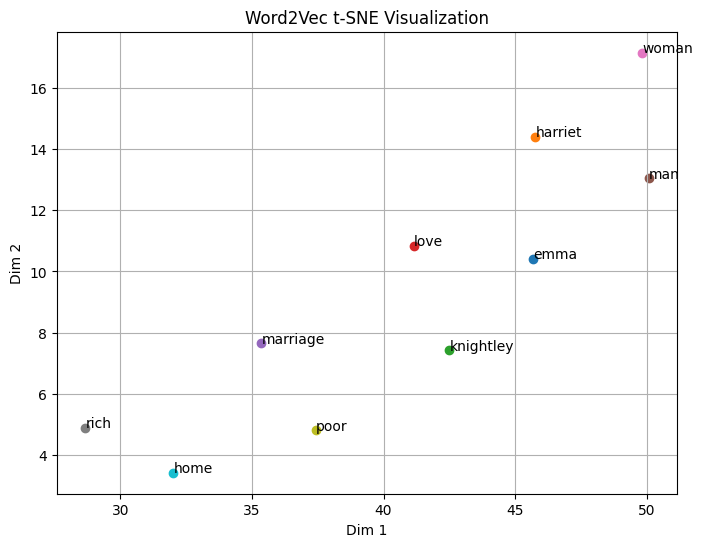

In [14]:
# Select a few words to visualize
words = ['emma', 'harriet', 'knightley', 'love', 'marriage', 'man', 'woman', 'rich', 'poor', 'home']
word_vectors = [model.wv[word] for word in words]

# Convert list of word vectors to a NumPy array
import numpy as np
word_vectors_array = np.array(word_vectors)


# Reduce dimensions
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
reduced = tsne.fit_transform(word_vectors_array)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word)
plt.title("Word2Vec t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()